In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/csv/clicks_per_publisher_user_ip.csv')

# Frequency Encoding for 'ams_pblshr_id' (Publisher ID)
publisher_frequency = data['ams_pblshr_id'].value_counts()
data['ams_pblshr_id_encoded'] = data['ams_pblshr_id'].map(publisher_frequency)

# Frequency Encoding for 'buyer_id' (Buyer ID)
buyer_frequency = data['buyer_id'].value_counts()
data['buyer_id_encoded'] = data['buyer_id'].map(buyer_frequency)

ip_frequency = data['CLNT_RMT_IP'].value_counts()
data['ip_encoded'] = data['CLNT_RMT_IP'].map(ip_frequency)


In [2]:
print(data.head())

   ams_pblshr_id    buyer_id     CLNT_RMT_IP  click_count  \
0     5574630565  123-rooboo  172.226.114.64            5   
1     5574630565    12stamps  77.111.247.147            3   
2     5574630565    1mouses2    3.10.211.100            2   
3     5574630565    911gbite   109.169.34.29            2   
4     5574630565     ade0438   52.53.241.115            2   

   ams_pblshr_id_encoded  buyer_id_encoded  ip_encoded  
0                  41109                19         974  
1                  41109                80        1429  
2                  41109                25         431  
3                  41109                 8         234  
4                  41109                 4         291  


In [3]:

features = data[['ams_pblshr_id_encoded', 'buyer_id_encoded', 'ip_encoded', 'click_count']]

# Standardize the features (scaling)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check the scaled features
print(features_scaled[:5])


[[ 0.08933402  1.03408204  0.2212847   0.20926115]
 [ 0.08933402  6.10348429  0.67474313  0.08974258]
 [ 0.08933402  1.53271177 -0.31987559  0.0299833 ]
 [ 0.08933402  0.11992754 -0.51620814  0.0299833 ]
 [ 0.08933402 -0.21249228 -0.45940126  0.0299833 ]]


In [4]:
from sklearn.cluster import KMeans

# Apply K-means clustering (for example, with n_clusters = 3)
n_clusters = 2  # You can adjust this as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Check the clustering results
print(data[['ams_pblshr_id', 'buyer_id', 'click_count', 'CLNT_RMT_IP', 'cluster']].head())


   ams_pblshr_id    buyer_id  click_count     CLNT_RMT_IP  cluster
0     5574630565  123-rooboo            5  172.226.114.64        1
1     5574630565    12stamps            3  77.111.247.147        0
2     5574630565    1mouses2            2    3.10.211.100        1
3     5574630565    911gbite            2   109.169.34.29        1
4     5574630565     ade0438            2   52.53.241.115        1


In [11]:
# from sklearn.metrics import silhouette_score

# # Compute the silhouette score
# silhouette_avg = silhouette_score(features_scaled, data['cluster'])
# print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')


from sklearn.metrics import silhouette_score
import numpy as np

# Optionally, sample a subset of the data for silhouette score calculation to speed up
sampled_data = data.sample(frac=0.1, random_state=42)  # Adjust frac as needed
sampled_features_scaled = features_scaled[sampled_data.index]

# Compute the silhouette score on the sampled data
silhouette_avg = silhouette_score(sampled_features_scaled, sampled_data['cluster'])
print(f'Silhouette Score (approx.) for {n_clusters} clusters: {silhouette_avg}')


Silhouette Score (approx.) for 2 clusters: 0.5525433785385192


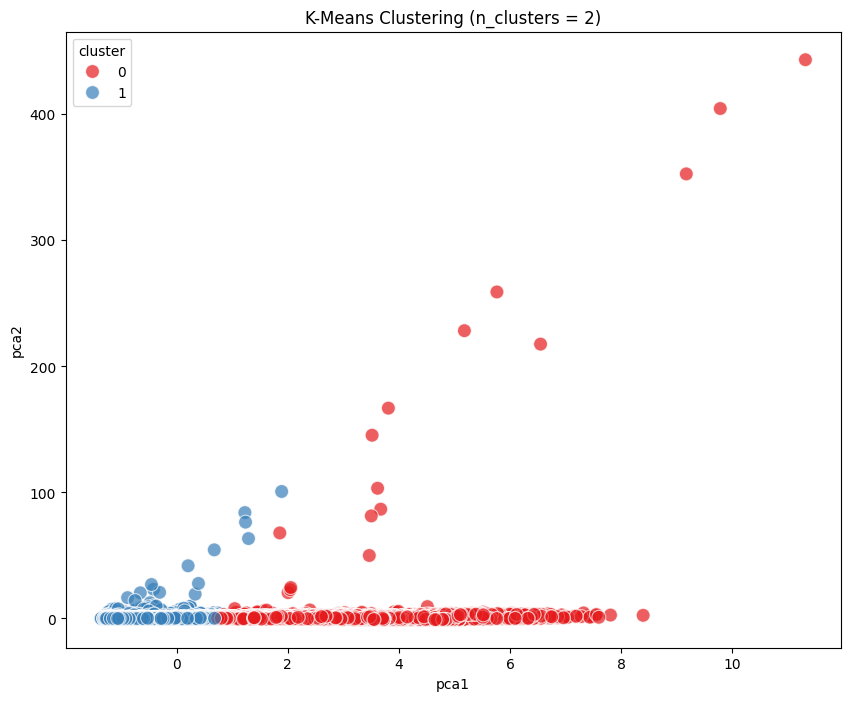

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Add PCA components to the data
data['pca1'] = pca_components[:, 0]
data['pca2'] = pca_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='Set1', s=100, alpha=0.7)
plt.title(f'K-Means Clustering (n_clusters = {n_clusters})')
plt.show()


In [5]:
data.to_csv('../data/csv/clicks_per_publisher_user_ip_cluster-2.csv', index=False)

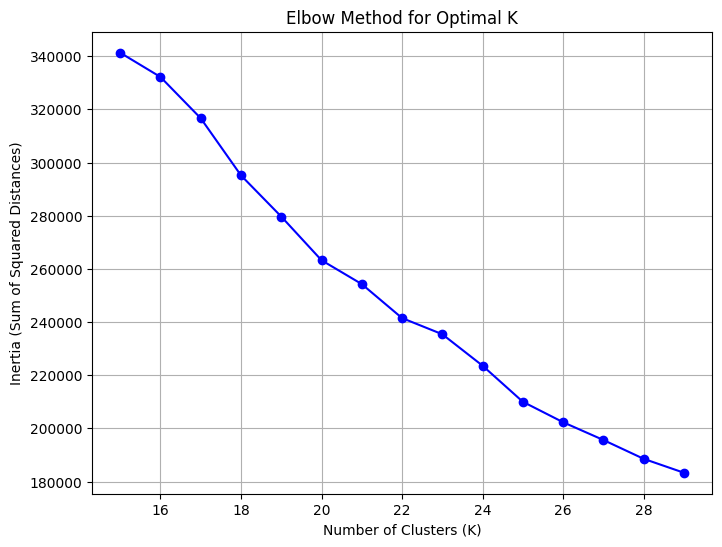

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of cluster values to test (for example, from 1 to 10)
range_n_clusters = list(range(15, 30))

# List to store inertia values
inertia_values = []

# Apply K-means for different values of k and store the inertia (within-cluster sum of squares)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


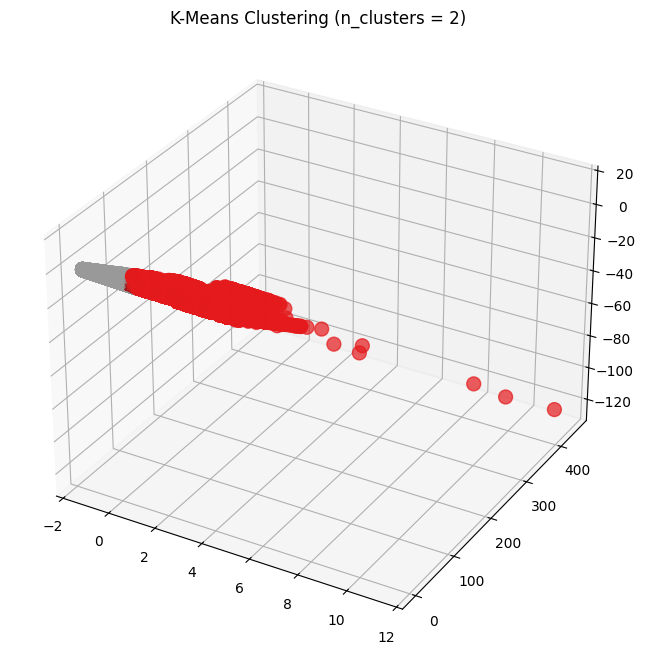

In [13]:
# Try reducing the data to 3 dimensions
pca = PCA(n_components=3)
pca_components = pca.fit_transform(features_scaled)

# Add PCA components to the data
data['pca1'] = pca_components[:, 0]
data['pca2'] = pca_components[:, 1]
data['pca3'] = pca_components[:, 2]

# For 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['pca1'], data['pca2'], data['pca3'], c=data['cluster'], cmap='Set1', s=100, alpha=0.7)
ax.set_title(f'K-Means Clustering (n_clusters = {n_clusters})')
plt.show()


In [14]:
# from sklearn.cluster import DBSCAN

# # Apply DBSCAN clustering
# eps_value = 0.5  # Adjust this as needed; determines how close points must be to be in the same cluster
# min_samples_value = 5  # Adjust this based on the density of your data

# dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
# data['cluster'] = dbscan.fit_predict(features_scaled)

# # Check the clustering results
# print(data[['ams_pblshr_id', 'buyer_id', 'click_count', 'CLNT_RMT_IP', 'cluster']].head())


In [8]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features_scaled' is your data that has been standardized
neighbors = NearestNeighbors(n_neighbors=5)  # Use k=5 neighbors for DBSCAN
neighbors_fit = neighbors.fit(features_scaled)

# Calculate the distance to the k-th (5th) nearest neighbor
distances, indices = neighbors_fit.kneighbors(features_scaled)

# Sort the distances
distances = np.sort(distances[:, 4], axis=0)  # 4th column for the 5th nearest neighbor
plt.plot(distances)
plt.title('K-distance plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()


KeyboardInterrupt: 

In [13]:
import random

# Randomly select a subset of 10,000 data points
sample_data = random.sample(list(features_scaled), 10000)


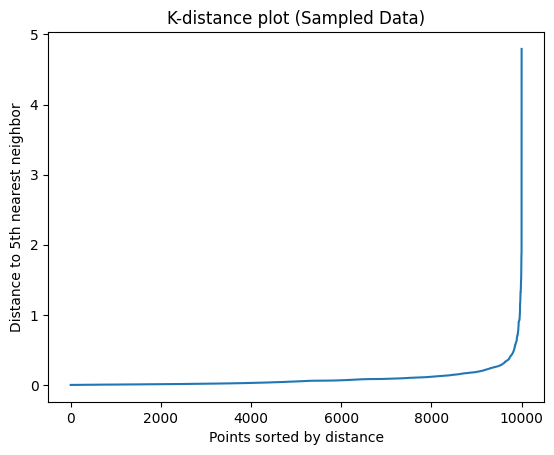

In [14]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Fit NearestNeighbors to the sampled data (k=5)
neighbors = NearestNeighbors(n_neighbors=5, n_jobs=-1)
neighbors_fit = neighbors.fit(sample_data)

# Calculate the distances to the 5th nearest neighbor
distances, indices = neighbors_fit.kneighbors(sample_data)

# Sort the distances to the 5th nearest neighbor
distances = np.sort(distances[:, 4], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('K-distance plot (Sampled Data)')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()


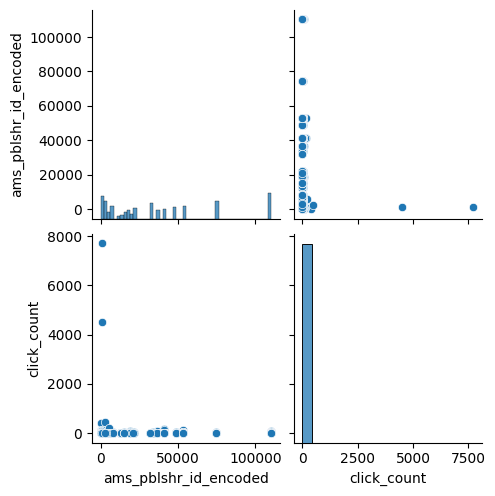

In [22]:
# Example: features to explore, replace with your actual feature names
# features_to_plot = ['ams_pblshr_id_encoded', 'buyer_id_encoded', 'ip_encoded', 'click_count']
# features_to_plot = ['ip_encoded', 'click_count']
# features_to_plot = ['ams_pblshr_id_encoded', 'click_count']
# features_to_plot = ['ams_pblshr_id_encoded', 'buyer_id_encoded', 'ip_encoded', 'click_count']
# Sample 10% of the data for pairplot visualization (adjust as needed)
subsample = data.sample(frac=0.1, random_state=42)

# Create the pairplot of the subsampled data
sns.pairplot(subsample[features_to_plot])
plt.show()

# Visualize pairwise relationships before clustering
# sns.pairplot(data[features_to_plot])

# # Display the plot
# plt.show()
